In [1]:
# Análise Descritiva dos Dados

import pandas as pd

# Carregando os dados
df = pd.read_csv('data/raw/car_prices.csv')

# Estatísticas descritivas
print(df.describe(include='all'))

# Preenchendo valores ausentes numéricos com a mediana
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Preenchendo valores ausentes categóricos com a moda
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]  # Obtendo o valor mais frequente
    df[column].fillna(mode_value, inplace=True)

# Verificando se ainda há valores ausentes
print(df.isnull().sum())


          Unnamed: 0 Mês de referência Código Fipe            Marca    Modelo  \
count   84239.000000             84239       84239            84239     84239   
unique           NaN                90        5196               30       673   
top              NaN        2017-03-01    035014-1  VW - VolksWagen  Sprinter   
freq             NaN              1334          85             8360      1943   
mean    42122.668693               NaN         NaN              NaN       NaN   
std     24318.375334               NaN         NaN              NaN       NaN   
min         0.000000               NaN         NaN              NaN       NaN   
25%     21063.500000               NaN         NaN              NaN       NaN   
50%     42123.000000               NaN         NaN              NaN       NaN   
75%     63182.500000               NaN         NaN              NaN       NaN   
max     84242.000000               NaN         NaN              NaN       NaN   

         Preço Médio Combus

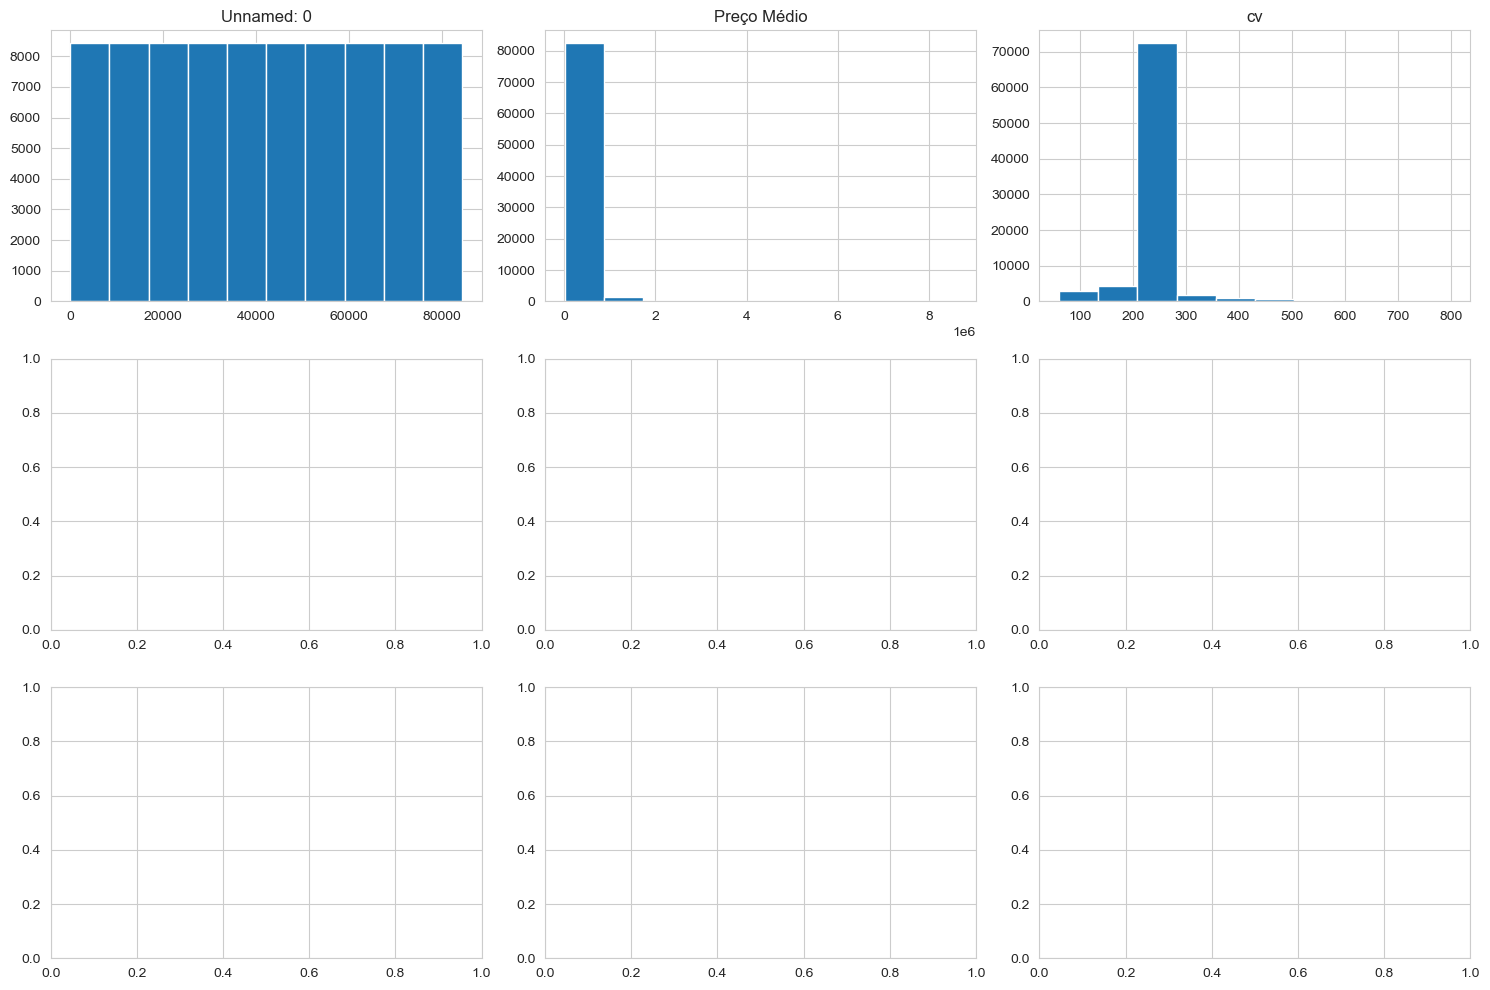

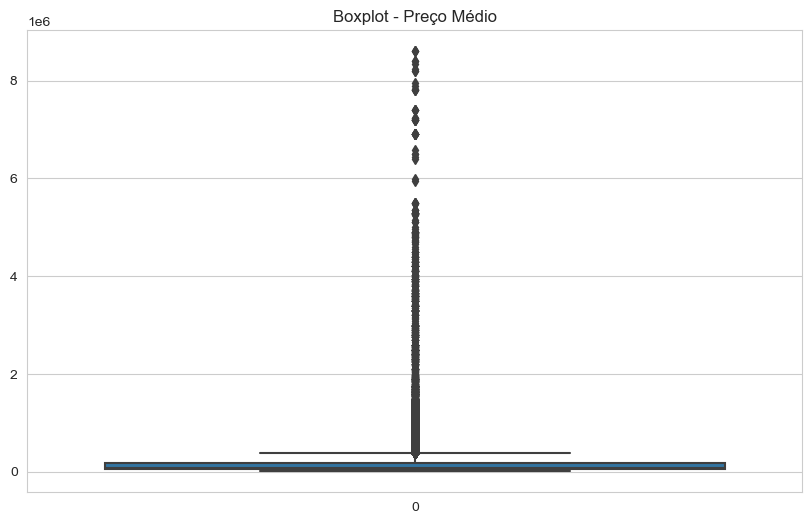

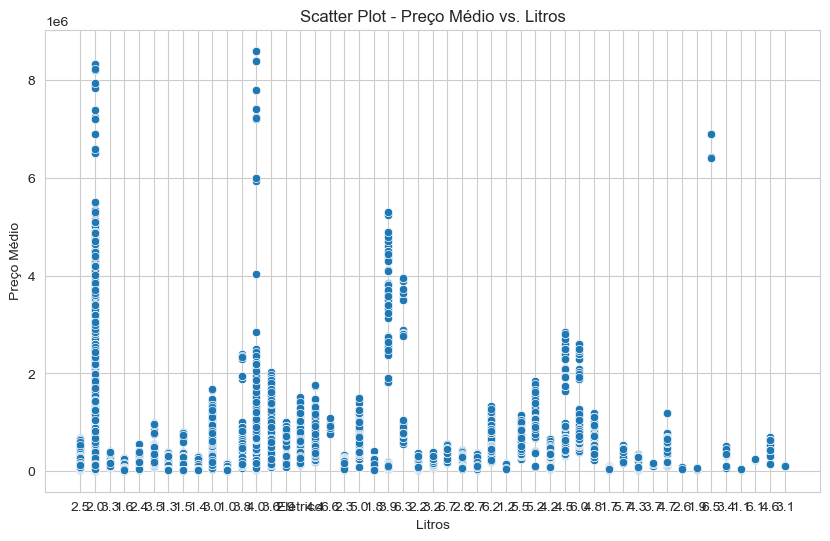

C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_30100\4202075268.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


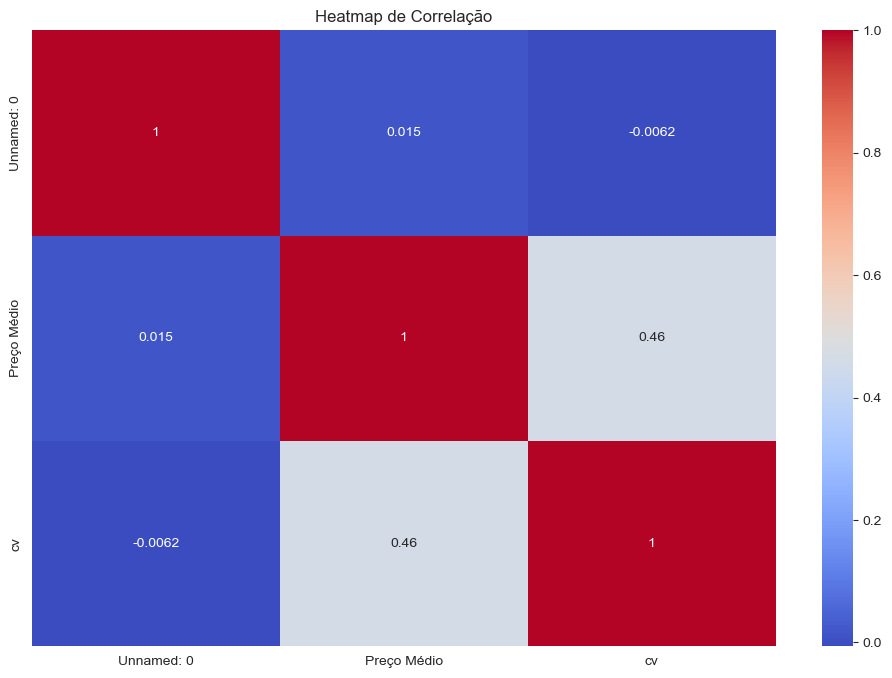

In [10]:
# Visualizações de Dados

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set_style("whitegrid")

# Histogramas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numeric_cols):
    ax = axes[i//3, i%3]
    df[col].hist(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Boxplots (exemplo: 'Preço Médio')
plt.figure(figsize=(10, 6))
sns.boxplot(df['Preço Médio'])
plt.title('Boxplot - Preço Médio')
plt.show()

# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Litros'], y=df['Preço Médio'])
plt.title('Scatter Plot - Preço Médio vs. Litros')
plt.xlabel('Litros')
plt.ylabel('Preço Médio')
plt.show()

# Heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()



In [11]:
# Tratamento de Valores Ausentes

# Verificando valores ausentes
print(df.isnull().sum())

# Preenchendo valores ausentes numéricos com a mediana
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Preenchendo valores ausentes categóricos com 'Desconhecido'
df.fillna('Desconhecido', inplace=True)


Unnamed: 0           0
Mês de referência    0
Código Fipe          0
Marca                0
Modelo               0
Preço Médio          0
Combustivel          0
Tração               0
Litros               0
Valvulas             0
v                    0
cv                   0
p                    0
Cambio               0
Inducao              0
versao               0
dtype: int64


In [12]:
# Detecção de Outliers (usando IQR):

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrando outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_30100\3169660735.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_30100\3169660735.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_30100\3169660735.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# Análise de Categorias

# Contagem de valores para colunas categóricas
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())
    print("\n")


2017-03-01    1041
2016-09-01     984
2015-06-01     984
2016-12-01     966
2015-03-01     961
              ... 
2023-06-01     472
2006-03-01     471
2022-12-01     465
2023-03-01     454
2005-03-01     446
Name: Mês de referência, Length: 90, dtype: int64


024101-6    77
028015-1    72
015065-7    72
005094-6    70
014045-7    69
            ..
003003-1     1
001014-6     1
001013-8     1
001073-1     1
029151-0     1
Name: Código Fipe, Length: 3853, dtype: int64


Fiat               7901
VW - VolksWagen    7765
GM - Chevrolet     6575
Ford               4827
Renault            4612
Mercedes-Benz      3667
Peugeot            3326
Citroën            2679
Toyota             2610
Nissan             2277
Audi               2182
Hyundai            2125
Mitsubishi         1989
Honda              1746
BMW                1424
Kia Motors         1223
Land Rover         1182
Volvo               956
Jeep                943
Suzuki              821
MINI                751
Caoa Chery          48

In [14]:
# Transformações de Dados

# Normalização (exemplo: 'Preço Médio')
df['Preço Médio'] = (df['Preço Médio'] - df['Preço Médio'].min()) / (df['Preço Médio'].max() - df['Preço Médio'].min())

# Variáveis dummy (exemplo: 'Combustivel')
df = pd.get_dummies(df, columns=['Combustivel'], drop_first=True)


In [15]:
# Análise de Correlação

correlations = df.corr()
print(correlations)


                      Unnamed: 0  Preço Médio  cv  Combustivel_Elétrico  \
Unnamed: 0              1.000000     0.024518 NaN              0.011640   
Preço Médio             0.024518     1.000000 NaN              0.088579   
cv                           NaN          NaN NaN                   NaN   
Combustivel_Elétrico    0.011640     0.088579 NaN              1.000000   
Combustivel_Flex       -0.007879    -0.432241 NaN             -0.045448   
Combustivel_Gasolina    0.007709     0.284149 NaN             -0.029080   
Combustivel_Hibrido    -0.001844     0.172855 NaN             -0.003877   
Combustivel_Álcool      0.009530    -0.097280 NaN             -0.004568   

                      Combustivel_Flex  Combustivel_Gasolina  \
Unnamed: 0                   -0.007879              0.007709   
Preço Médio                  -0.432241              0.284149   
cv                                 NaN                   NaN   
Combustivel_Elétrico         -0.045448             -0.029080   
Comb

C:\Users\EmersonLas\AppData\Local\Temp\ipykernel_30100\1569552095.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [19]:
# Feature Engineering

# Verificando se as colunas necessárias estão presentes no DataFrame
if 'Litros' in df.columns and 'Preço Médio' in df.columns:
    
    # Convertendo a coluna 'Litros' para numérico e tratando possíveis erros
    df['Litros'] = pd.to_numeric(df['Litros'], errors='coerce')
    
    # Informações sobre valores ausentes antes do tratamento
    print(f"Valores ausentes em 'Litros' antes do tratamento: {df['Litros'].isnull().sum()}")
    
    # Preenchendo possíveis NaNs após a conversão com a mediana
    df['Litros'].fillna(df['Litros'].median(), inplace=True)
    
    # Informações sobre valores ausentes após o tratamento
    print(f"Valores ausentes em 'Litros' após o tratamento: {df['Litros'].isnull().sum()}")
    
    # Verificando se há algum valor '0' em 'Litros' para evitar divisão por zero
    if df[df['Litros'] == 0].shape[0] == 0:
        # Criando a nova característica 'Preço_por_Litro'
        df['Preço_por_Litro'] = df['Preço Médio'] / df['Litros']
    else:
        print("Existem valores '0' na coluna 'Litros'. A divisão por zero será evitada.")
        df['Preço_por_Litro'] = df.apply(lambda row: row['Preço Médio'] / row['Litros'] if row['Litros'] != 0 else 0, axis=1)

else:
    print("As colunas necessárias não estão presentes no DataFrame.")



Valores ausentes em 'Litros' antes do tratamento: 0
Valores ausentes em 'Litros' após o tratamento: 0
